Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve,auc,jaccard_score,precision_score,recall_score,accuracy_score,f1_score,precision_recall_curve,confusion_matrix,)
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
df = pd.read_csv('Country.csv')

Define a threshold to convert the problem into binary classification

In [3]:
threshold = 10 

Create a new binary target column based on the threshold

In [4]:
df['Binary_Deaths'] = (df['Deaths'] >= threshold).astype(int)

Split the dataset into training and testing sets

In [5]:
X = df[['Year', 'Cases']]
y = df['Binary_Deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

XGBoost Classifier

In [6]:
# Instantiate the XGBoost classifier
model = xgb.XGBClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make probability predictions on the test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (deaths)

# Set a threshold (0.5) to classify predictions as binary
y_pred = (y_prob >= 0.5).astype(int)

Performance Metrics

In [7]:
# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)

# Calculate the Jaccard Index (IU score)
iu_score = jaccard_score(y_test, y_pred)

# Calculate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

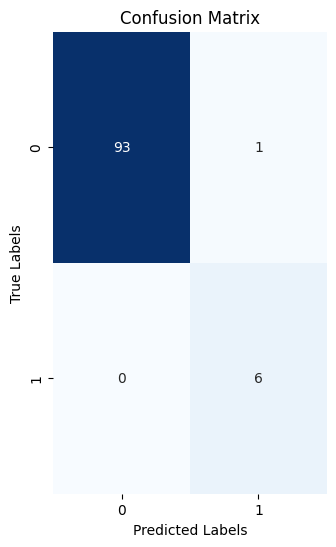

In [8]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

Box Plot

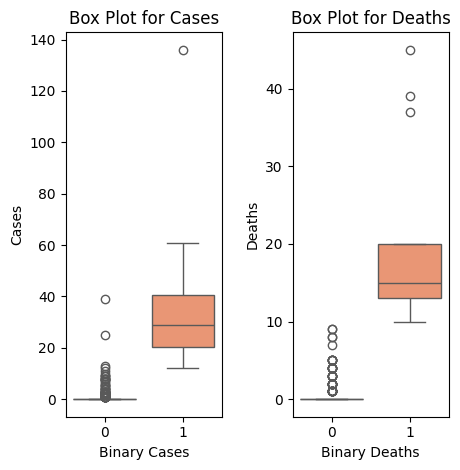

In [9]:
plt.subplot(1, 3, 2)
sns.boxplot(x='Binary_Deaths', y='Cases', data=df, hue='Binary_Deaths', palette='Set2', legend=False)
plt.xlabel('Binary Cases')
plt.ylabel('Cases')
plt.title('Box Plot for Cases')

plt.subplot(1, 3, 3)
sns.boxplot(x='Binary_Deaths', y='Deaths', data=df, hue='Binary_Deaths', palette='Set2', legend=False)
plt.xlabel('Binary Deaths')
plt.ylabel('Deaths')
plt.title('Box Plot for Deaths')

plt.tight_layout()
plt.show()

ROC Curve

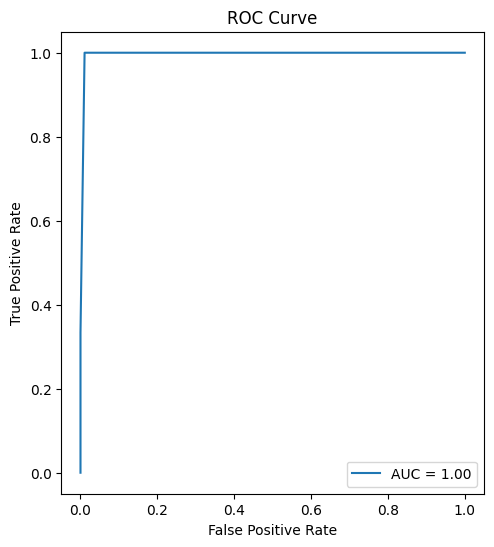

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Precision-Recall curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()

In [13]:
print('AUC:', auc_score)
print('IU score:', iu_score)
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

AUC: 0.9964539007092198
IU score: 0.8571428571428571
Precision: [0.06       0.09230769 0.75       0.85714286 1.         1.        ]
Recall: [1.         1.         1.         1.         0.33333333 0.        ]
Accuracy: 0.99
F1 Score: 0.923076923076923


Visualisation of Dataset

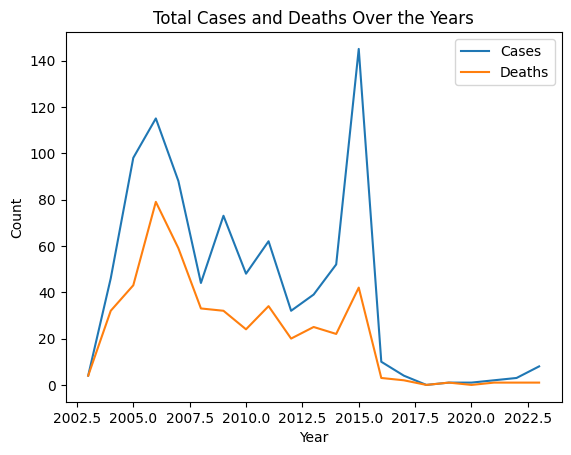

In [15]:
# Group the data by year and calculate the total cases and deaths
yearly_data = df.groupby('Year')[['Cases', 'Deaths']].sum()

# Create a line plot
yearly_data.plot(kind='line')

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Cases and Deaths Over the Years')

# Show the plot
plt.show()

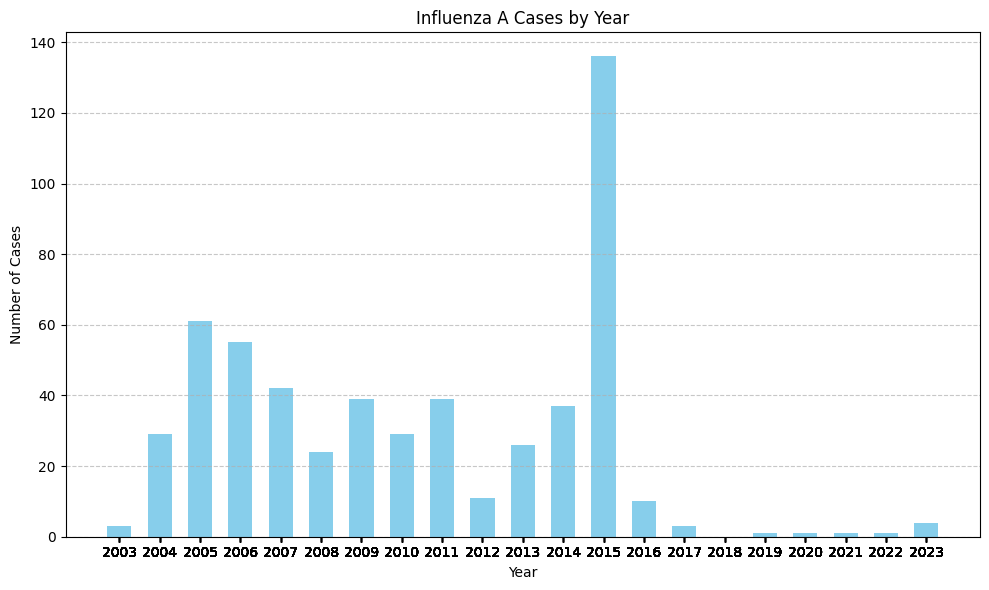

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path to your CSV file
file_path = "Country.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Extract data for visualization
years = df['Year']
cases = df['Cases']

# Set the width of the bars to create spacing
bar_width = 0.6  # Adjust this value as needed

# Create a bar chart with adjusted spacing
plt.figure(figsize=(10, 6))  # Increase the figure width to accommodate wider bars
plt.bar(years, cases, color='skyblue', width=bar_width)
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Influenza A Cases by Year')
plt.xticks(years)  # Show all years on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()

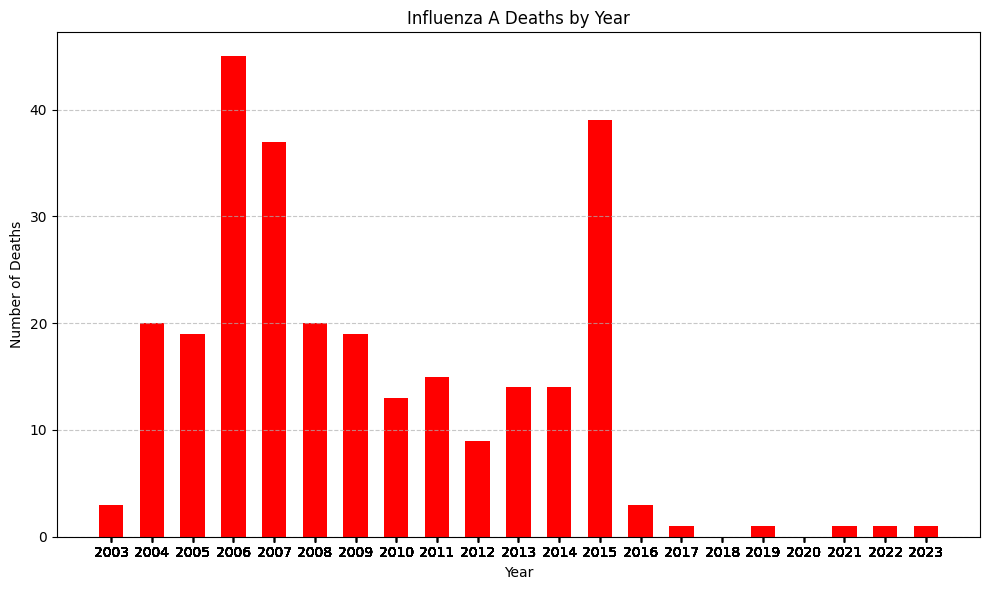

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path to your CSV file
file_path = "Country.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Extract data for visualization
years = df['Year']
Deaths = df['Deaths']

# Set the width of the bars to create spacing
bar_width = 0.6  # Adjust this value as needed

# Create a bar chart with adjusted spacing
plt.figure(figsize=(10, 6))  # Increase the figure width to accommodate wider bars
plt.bar(years, Deaths, color='red', width=bar_width)
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Influenza A Deaths by Year')
plt.xticks(years)  # Show all years on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()